In [26]:
from keras.models import Model
from keras.layers import Dense,Input
from keras.datasets import mnist
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [27]:
(x_train_img,_),(x_test_img,_)=mnist.load_data()

In [28]:
x_train_img.shape
# np.prod(x_train.shape[1:])

(60000, 28, 28)

In [29]:
x_train_img=x_train_img.reshape(60000,28*28)
x_test_img=x_test_img.reshape(10000,28*28)
x_train_img=x_train_img.astype('float64')
x_test_img=x_test_img.astype('float64')
x_train_img=x_train_img/255
x_test_img=x_test_img/255

In [30]:
batch_size=128
nb_epochs=5
img_row,img_col=28,28
nb_visible=img_row*img_col
nb_hidden=16

In [31]:
# building auto encoder model
input_img=Input(shape=(nb_visible,)) # 28*28 -> 784
""" In between we can add any number of simple or complex layers model is used for non-linearity"""
encoded=Dense(nb_hidden,activation='relu')(input_img) # 16* 784 with relu gives 12,544 params
decoded=Dense(nb_visible,activation='sigmoid')(encoded) # 784 * 12,544 with sigmoid gives 9,834,496 params 

In [32]:
# autoencoded
autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        13,328 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,888 (101.12 KB)

 Trainable params: 25,888 (101.12 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
autoencoder.fit(x_train_img,x_train_img,epochs=nb_epochs,batch_size=batch_size,verbose=1,shuffle=True,validation_data=(x_test_img,x_test_img))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6925 - val_loss: 0.6924
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6923 - val_loss: 0.6922
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6921 - val_loss: 0.6920
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6919 - val_loss: 0.6918


## EVALUATION

In [34]:
evaluation=autoencoder.evaluate(x_test_img,x_test_img,batch_size=128,verbose=1)
print('loss: {:.2f}'.format(evaluation))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6927  
loss: 0.69


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step


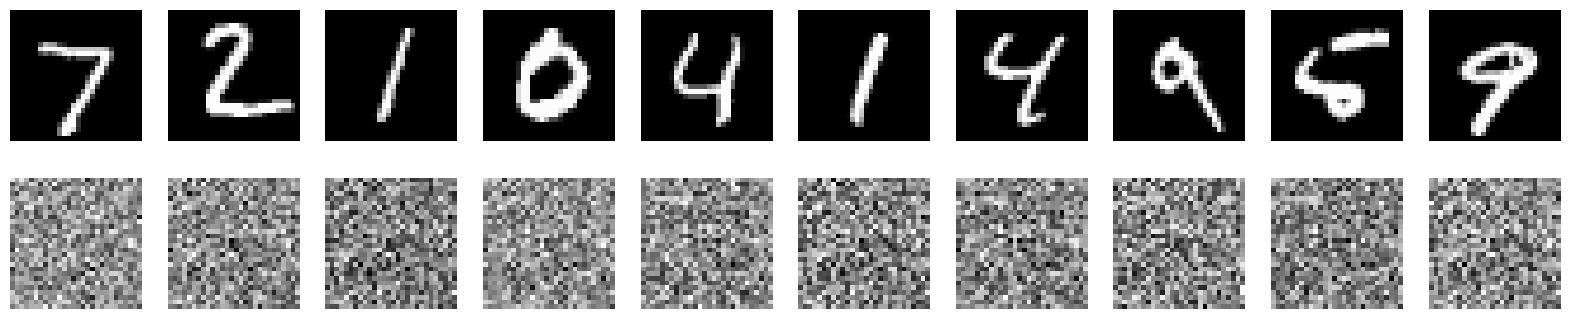

In [35]:
decoded_img = autoencoder.predict(x_test_img)
n = 10
plt.figure(figsize=(20, 4))  # Corrected 'Figure' to 'figure'

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_img[i].reshape(28, 28))
    plt.gray()
    ax.axis("off")  # Hide axes for better visualization

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_img[i].reshape(28, 28))  # Updated 'decoded' to 'decoded_img'
    plt.gray()
    ax.axis("off")

plt.show()

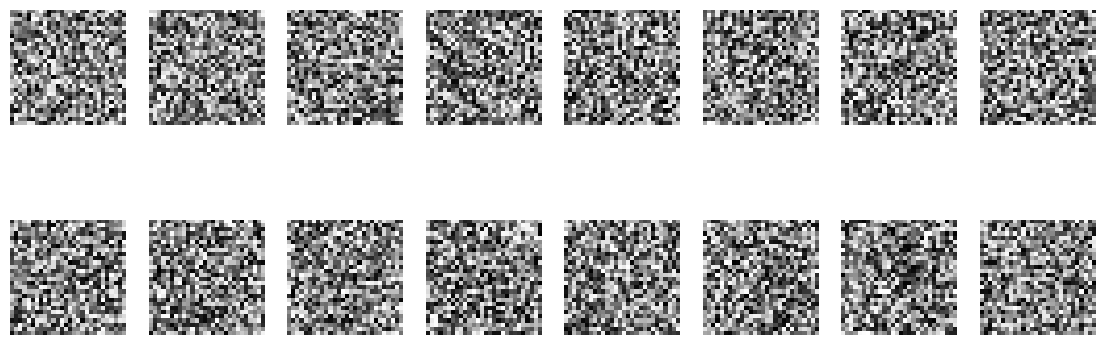

In [39]:

w = [layer.get_weights() for layer in autoencoder.layers if layer.get_weights()]

layer1 = np.array(w[0][0])  # First trainable layer weights

fig = plt.figure(figsize=(14, 5))
col = 8
row = layer1.shape[1] // col  # Adjust rows based on number of filters

for i in range(1, col * row + 1):
    fig.add_subplot(row, col, i)
    plt.imshow(layer1[:, i-1].reshape(28, 28), cmap='gray')
    plt.axis('off')  # Hide axis for better visualization

plt.show()
